In [19]:
import matplotlib.pyplot as plt
import numpy as np
import random

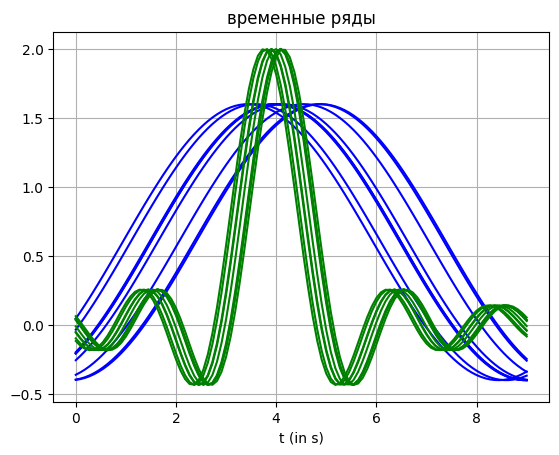

In [13]:
time_index = np.linspace(0, 9, 100)

tseries_list = []
d = np.random.random(size=20)

f0 = 0.2

for i in range(10):
    tseries_list.append(-np.cos(np.pi*f0*time_index + d[i]) + 0.6)

for i in range(10, 20):
    tseries_list.append(2*np.sin(np.pi*time_index+ 2*d[i]-13) /(np.pi*time_index+ 2*d[i]-13))

for i in range(10):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(10, 20):
    plt.plot(time_index, tseries_list[i], '-g')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()

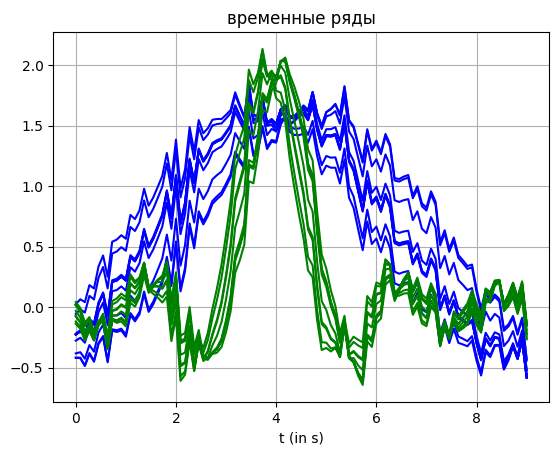

In [14]:
white_noise_g = np.random.normal(loc = 0, scale = 0.1, size = 100)

for i in range(20):
    tseries_list[i] += white_noise_g

for i in range(10):
    plt.plot(time_index, tseries_list[i], '-b')
for i in range(10, 20):
    plt.plot(time_index, tseries_list[i], '-g')
            
plt.title(r'временные ряды')
plt.xlabel(r't (in s)')
plt.grid()    

In [26]:
def generate_shapelet_candidates(Ti, min_len = 3, max_len = 100):
    shapelet_candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            shapelet_candidates.append(subsequence)
    return shapelet_candidates


In [27]:
from scipy.spatial.distance import euclidean

def calculate_distances(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [28]:
def evaluate_candidate_shapelets(DS):
    quality = np.mean(np.abs(DS))
    return quality

In [29]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result


In [30]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result


In [31]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result


In [32]:
def discovery_of_shapelets(tseries_list, k = 50, min_len = 3, max_len = 100):
    r_shapelets = []
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            shapelet_candidates = generate_shapelet_candidates(tseries, min_len, max_len)
            for candidate in shapelet_candidates:
                distances = calculate_distances(candidate, shapelet_candidates)
                quality = evaluate_candidate_shapelets(distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        r_shapelets = merge(k, r_shapelets, shapelets)
    return r_shapelets

In [33]:
shapletes_0 = discovery_of_shapelets(tseries_list[0:10], k = 20, min_len= 4 , max_len= 4)
shapletes_1 = discovery_of_shapelets(tseries_list[11:20], k = 20, min_len= 4 , max_len= 4)

In [43]:
from sklearn.model_selection import train_test_split


x = []
Y = []
shpletes_qual = shapletes_0 + shapletes_1

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]  
    x.append(res)
    
    if i < len(shapletes_0):
        Y.append(0)
    else:
        Y.append(1)

X_train = []
X_test = []
Y_train = []
Y_test = []

indexes = np.arange(len(Y))
random.shuffle(indexes)

X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2)


In [44]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

TimeSeriesForest(random_state=42)

In [46]:
y_true, y_pred = [], []

print("TimeSeriesForest")
print(f"Accuracy {clf.score(X_test, Y_test)}")

TimeSeriesForest
Accuracy 1.0
